<div style="background-color: #013a63; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Final Project - Network Anomaly Detection
</div>

### Project Overview

This project focuses on developing a network intrusion detection system (NIDS) using unsupervised learning techniques. The primary objective is to identify anomalous or malicious network activities without relying on pre-labeled data. By analyzing the inherent patterns and structures within network traffic, we aim to build models that can effectively distinguish between normal behavior and potential threats.

The analysis will be performed on the [Network Intrusion Detection dataset from Kaggle](https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection), which contains a variety of network traffic features.

The core of this project involves:
1.  **Exploratory Data Analysis (EDA):** To understand the distribution and relationships of network features.
2.  **Data Preprocessing:** Cleaning and preparing the data for modeling, including scaling and encoding categorical features.
3.  **Unsupervised Model Implementation:** Applying algorithms such as K-Means Clustering, Isolation Forest, and Autoencoders to detect anomalies.
4.  **Model Evaluation:** Assessing the performance of the models in identifying intrusions, potentially using the provided labels in the test set for validation.






<div style="background-color: magenta; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Predictive, Exploratory and Analytical Questions
</div>

### Exploratory and Analytical Questions

1.  **What are the statistical properties of normal network traffic?**
    *   What are the typical distributions for features like `duration`, `src_bytes`, and `dst_bytes`?
    *   Which `protocol_type` (e.g., TCP, UDP, ICMP) and `service` (e.g., HTTP, FTP, SMTP) are most common?

2.  **Are there strong correlations between different network features?**
    *   For example, does a high `count` (number of connections to the same host) correlate with specific flags or services?
    *   Understanding these relationships can help in feature engineering and interpreting model behavior.

3.  **Can we identify distinct clusters of network activity?**
    *   Using clustering algorithms like K-Means, can we group connections into meaningful categories?
    *   Do these clusters naturally separate normal traffic from potential anomalies?

### Predictive Questions

1.  **Can an unsupervised model effectively detect network intrusions?**
    *   How accurately can algorithms like Isolation Forest or Autoencoders identify connections that deviate from the norm?
    *   What is the trade-off between detecting true positives (intrusions) and minimizing false positives (flagging normal traffic as anomalous)?

2.  **Which features are the most significant indicators of an anomaly?**
    *   When an anomaly is detected, can we identify which features contributed most to the anomaly score? This is crucial for understanding the nature of a potential threat.

3.  **How well do different unsupervised models compare in performance?**
    *   By evaluating models on a labeled test set (for validation purposes only), which algorithm provides the best balance of precision and recall for identifying intrusions?

### Unsupervised Learning Techniques for Anomaly Detection

For this project, we explore several unsupervised learning models to detect network anomalies. These models learn the patterns of normal network traffic and identify deviations without needing pre-labeled data. The primary techniques under consideration are:

1.  **K-Means Clustering:**
    *   **How it works:** Partitions the data into a pre-defined number of clusters (K). Normal data points form dense clusters, while anomalies are far from any cluster center.
    *   **Anomaly Detection:** Data points far from cluster centroids or not belonging to any cluster are flagged as anomalies.

2.  **Isolation Forest:**
    *   **How it works:** An ensemble method that builds a forest of random trees, isolating anomalies more easily due to their distinctiveness.
    *   **Anomaly Detection:** Points with shorter average path lengths in the trees are considered anomalies.

3.  **Autoencoders:**
    *   **How it works:** Neural networks trained to reconstruct input data. The encoder compresses the input, and the decoder reconstructs it.
    *   **Anomaly Detection:** Trained on normal data; high reconstruction error on new data indicates anomalies.

4.  **DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**
    *   **How it works:** Groups points that are closely packed together and marks points that lie alone in low-density regions as outliers.
    *   **Anomaly Detection:** Points labeled as noise (not assigned to any cluster) are considered anomalies.

5.  **Agglomerative (Hierarchical) Clustering:**
    *   **How it works:** Builds nested clusters by successively merging or splitting clusters based on distance metrics.
    *   **Anomaly Detection:** After clustering, points in small or singleton clusters can be flagged as anomalies.

6.  **Gaussian Mixture Model (GMM):**
    *   **How it works:** Models the data as a mixture of several Gaussian distributions. Each point is assigned a probability of belonging to each cluster.
    *   **Anomaly Detection:** Points with low likelihood under all components are considered anomalies.

These diverse approaches allow us to compare the effectiveness of different unsupervised anomaly detection strategies on network intrusion data.

<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Install Dependencies
</div>

In [2]:
#! pip3 install kagglehub
#! pip3 install tensorflow

<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Libraries
</div>

In [3]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import kagglehub

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
)
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense



<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Network Intrusion Detection Dataset
</div>

### About Dataset

This dataset is for network intrusion detection, a critical task in cybersecurity. It contains various features of network connections and a label indicating whether a connection is 'normal' or an 'anomaly' (i.e., a potential intrusion). The data is derived from the well-known KDD Cup 1999 dataset, which is a benchmark for evaluating intrusion detection systems.

The dataset is split into `Train_data.csv` and `Test_data.csv`, making it suitable for training and evaluating machine learning models. It consists of 41 features for each connection and one target class.

### Table of Contents

*   [Feature Categories](#feature-categories)
    *   [Basic Features](#basic-features)
    *   [Content Features](#content-features)
    *   [Time-based Traffic Features](#time-based-traffic-features)
    *   [Host-based Traffic Features](#host-based-traffic-features)
*   [Target Variable](#target-variable)
*   [Source Information](#source-information)

---

### Feature Categories

The 41 features can be grouped into four categories:

#### Basic Features
Basic features of individual TCP connections.
*   **duration**: Length of the connection in seconds.
*   **protocol\_type**: Type of the protocol (e.g., `tcp`, `udp`, `icmp`).
*   **service**: Network service on the destination (e.g., `http`, `telnet`, `ftp`).
*   **flag**: Status of the connection (e.g., `SF` for normal, `REJ` for rejected).
*   **src\_bytes**: Number of data bytes from source to destination.
*   **dst\_bytes**: Number of data bytes from destination to source.
*   **land**: 1 if connection is from/to the same host/port; 0 otherwise.
*   **wrong\_fragment**: Number of "wrong" fragments.
*   **urgent**: Number of urgent packets.

#### Content Features
Domain-knowledge-based features looking for suspicious behavior in the content.
*   **hot**: Number of "hot" indicators (e.g., accessing system directories).
*   **num\_failed\_logins**: Number of failed login attempts.
*   **logged\_in**: 1 if successfully logged in; 0 otherwise.
*   **num\_compromised**: Number of "compromised" conditions.
*   **root\_shell**: 1 if root shell is obtained; 0 otherwise.
*   **su\_attempted**: 1 if "su root" command is attempted; 0 otherwise.
*   **num\_root**: Number of "root" accesses.
*   **num\_file\_creations**: Number of file creation operations.
*   **num\_shells**: Number of shell prompts.
*   **num\_access\_files**: Number of operations on access control files.
*   **num\_outbound\_cmds**: Number of outbound commands in an FTP session.
*   **is\_host\_login**: 1 if the login belongs to the "hot" list; 0 otherwise.
*   **is\_guest\_login**: 1 if the login is a "guest" login; 0 otherwise.

#### Time-based Traffic Features
Features computed using a two-second time window.
*   **count**: Number of connections to the same host in the past 2 seconds.
*   **srv\_count**: Number of connections to the same service in the past 2 seconds.
*   **serror\_rate**: Percentage of connections that have "SYN" errors.
*   **srv\_serror\_rate**: Percentage of connections to the same service that have "SYN" errors.
*   **rerror\_rate**: Percentage of connections that have "REJ" errors.
*   **srv\_rerror\_rate**: Percentage of connections to the same service that have "REJ" errors.
*   **same\_srv\_rate**: Percentage of connections to the same service.
*   **diff\_srv\_rate**: Percentage of connections to different services.
*   **srv\_diff\_host\_rate**: Percentage of connections to different hosts.

#### Host-based Traffic Features
Features based on connections to the destination host.
*   **dst\_host\_count**: Number of connections to the same destination host.
*   **dst\_host\_srv\_count**: Number of connections to the same service on the same destination host.
*   **dst\_host\_same\_srv\_rate**: Percentage of connections to the same service on the same destination host.
*   **dst\_host\_diff\_srv\_rate**: Percentage of connections to different services on the same destination host.
*   **dst\_host\_same\_src\_port\_rate**: Percentage of connections from the same source port to the same destination host.
*   **dst\_host\_srv\_diff\_host\_rate**: Percentage of connections to the same service from different hosts.
*   **dst\_host\_serror\_rate**: Percentage of connections to the destination host that have "SYN" errors.
*   **dst\_host\_srv\_serror\_rate**: Percentage of connections to the same service on the destination host that have "SYN" errors.
*   **dst\_host\_rerror\_rate**: Percentage of connections to the destination host that have "REJ" errors.
*   **dst\_host\_srv\_rerror\_rate**: Percentage of connections to the same service on the destination host that have "REJ" errors.

### Target Variable

*   **class**: The label for the connection, indicating if it is `normal` or an `anomaly`.

---

### Source Information

This dataset is based on the KDD Cup 1999 dataset, a widely used benchmark in the field of intrusion detection.

*   **Dataset Author**: Sampada Bhave
*   **Kaggle Dataset Link**: [Network Intrusion Detection](https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection)
*   **Original Data Source**: [KDD Cup 1999](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html)




<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Loading the Dataset and Inspection
</div>

### Loading Data

In [4]:
# Download the dataset using kagglehub

path = kagglehub.dataset_download("sampadab17/network-intrusion-detection")
print("Path to dataset files:", path)

# Load the CSV file into a DataFrame
test_df = pd.read_csv(os.path.join(path, "Test_data.csv"))
train_df = pd.read_csv(os.path.join(path, "Train_data.csv"))

# Display the first few rows of the DataFrame
test_df.head().T

Path to dataset files: C:\Users\Afiat_Trading\.cache\kagglehub\datasets\sampadab17\network-intrusion-detection\versions\1


,0,1,2,3,4
duration,0,0,2,0,1
protocol_type,tcp,tcp,tcp,icmp,tcp
service,private,private,ftp_data,eco_i,telnet
flag,REJ,REJ,SF,SF,RSTO
src_bytes,0,0,12983,20,0
dst_bytes,0,0,0,0,15
land,0,0,0,0,0
wrong_fragment,0,0,0,0,0
urgent,0,0,0,0,0
hot,0,0,0,0,0


In [5]:
train_df.head().T

,0,1,2,3,4
duration,0,0,0,0,0
protocol_type,tcp,udp,tcp,tcp,tcp
service,ftp_data,other,private,http,http
flag,SF,SF,S0,SF,SF
src_bytes,491,146,0,232,199
dst_bytes,0,0,0,8153,420
land,0,0,0,0,0
wrong_fragment,0,0,0,0,0
urgent,0,0,0,0,0
hot,0,0,0,0,0


### Data Types

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

### Describe Dataset

In [8]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,22544.0,218.859076,1407.176612,0.0,0.00,0.00,0.0000,57715.0
src_bytes,22544.0,10395.450231,472786.431088,0.0,0.00,54.00,287.0000,62825648.0
dst_bytes,22544.0,2056.018808,21219.297609,0.0,0.00,46.00,601.0000,1345927.0
land,22544.0,0.000311,0.017619,0.0,0.00,0.00,0.0000,1.0
wrong_fragment,22544.0,0.008428,0.142599,0.0,0.00,0.00,0.0000,3.0
urgent,22544.0,0.000710,0.036473,0.0,0.00,0.00,0.0000,3.0
hot,22544.0,0.105394,0.928428,0.0,0.00,0.00,0.0000,101.0
num_failed_logins,22544.0,0.021647,0.150328,0.0,0.00,0.00,0.0000,4.0
logged_in,22544.0,0.442202,0.496659,0.0,0.00,0.00,1.0000,1.0
num_compromised,22544.0,0.119899,7.269597,0.0,0.00,0.00,0.0000,796.0


In [9]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


### Statistical properties of normal network traffic

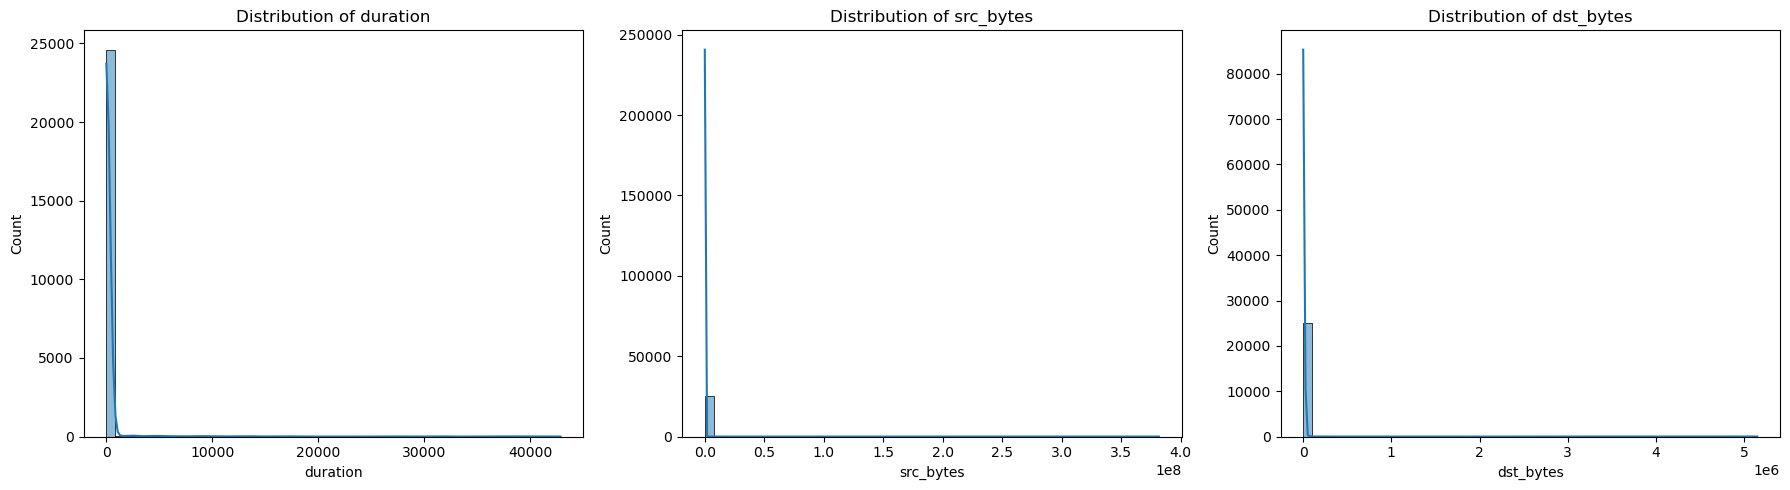

Most common protocol_type values:
protocol_type
tcp     20526
udp      3011
icmp     1655
Name: count, dtype: int64

Most common service values:
service
http        8003
private     4351
domain_u    1820
smtp        1449
ftp_data    1396
eco_i        909
other        858
ecr_i        613
telnet       483
finger       366
Name: count, dtype: int64


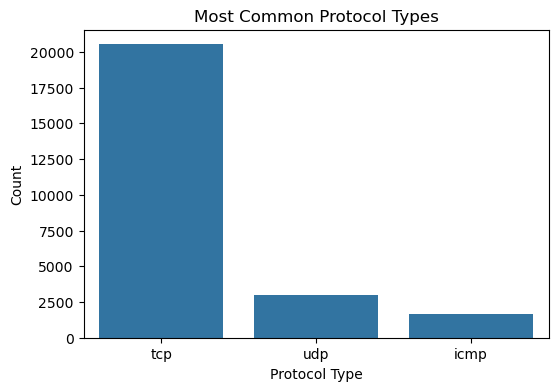

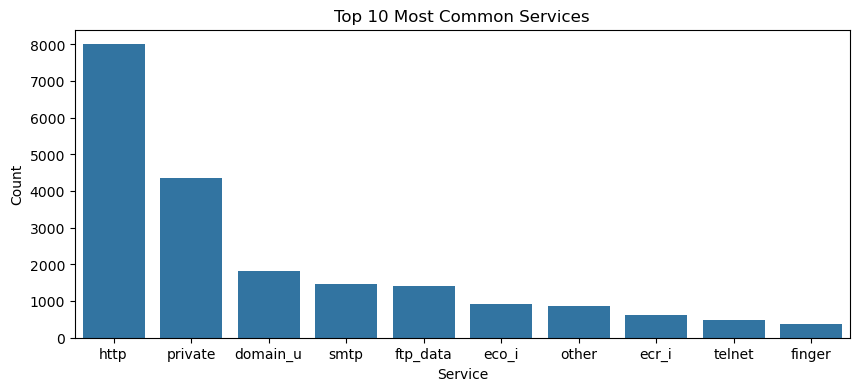

In [10]:
# Plot distributions for 'duration', 'src_bytes', and 'dst_bytes'
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(train_df['duration'], bins=50, ax=axes[0], kde=True)
axes[0].set_title('Distribution of duration')
sns.histplot(train_df['src_bytes'], bins=50, ax=axes[1], kde=True)
axes[1].set_title('Distribution of src_bytes')
sns.histplot(train_df['dst_bytes'], bins=50, ax=axes[2], kde=True)
axes[2].set_title('Distribution of dst_bytes')
plt.tight_layout()
plt.show()

# Most common protocol_type and service
print("Most common protocol_type values:")
print(train_df['protocol_type'].value_counts())

print("\nMost common service values:")
print(train_df['service'].value_counts().head(10))

# Plot the most common protocol_type
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='protocol_type', order=train_df['protocol_type'].value_counts().index)
plt.title('Most Common Protocol Types')
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.show()

# Plot the top 10 most common services
top_services = train_df['service'].value_counts().head(10).index
plt.figure(figsize=(10, 4))
sns.countplot(data=train_df[train_df['service'].isin(top_services)], x='service', order=top_services)
plt.title('Top 10 Most Common Services')
plt.xlabel('Service')
plt.ylabel('Count')
plt.show()

### Conclusion on Dataset Inspection

The initial inspection of the training and test datasets reveals the following:

*   **Size:** The training set contains 25,192 rows, while the test set has 22,544 rows.
*   **Features:** Both datasets include a mix of numerical and categorical features. The training set has an additional column (`class`) compared to the test set, which serves as the target variable.
*   **Data Types:** Features are a combination of `int64`, `float64`, and `object` (categorical) types.
*   **Target Variable:** The `class` column in the training data indicates whether a connection is `normal` or an `anomaly`.

**Statistical Properties of Normal Network Traffic:**

-   Features like `duration`, `src_bytes`, and `dst_bytes` are highly skewed, with most connections having low values and a few with very large values.
-   The most common `protocol_type` is **TCP**, followed by **UDP** and **ICMP**.
-   The top services observed are `http`, `private`, `domain_u`, `smtp`, and `ftp_data`.
-   Many features, such as `num_outbound_cmds` and `is_host_login`, have zero variance and will be dropped.
-   There is a high degree of multicollinearity among error rate and connection count features, suggesting redundancy and the need for dimensionality reduction.

For this project, which focuses on **unsupervised learning**, our approach is as follows:
1.  We primarily use the **training dataset** for model development and evaluation.
2.  The `class` label is used to separate "normal" traffic from "anomalous" traffic. Unsupervised models are trained exclusively on **normal data** to learn its patterns.
3.  The **test dataset** is reserved for future use or external validation, as it lacks labels for straightforward evaluation. The labeled training data allows us to directly assess how well the models distinguish anomalies after being trained on normal data.

<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Data Cleaning and Exploratory Data Analysis (EDA)
</div>

### Look for NaN/Null and Remove them

In [11]:
# Check for missing values in the training dataset
train_missing = train_df.isna().sum().sum()
if train_missing > 0:
    print(f"Found {train_missing} missing values in train_df. Removing rows with missing values.")
    train_df.dropna(inplace=True)
else:
    print("No missing values found in train_df.")

# Verify that missing values are handled
print(f"\nMissing values in train_df after cleaning: {train_df.isnull().sum().sum()}")


No missing values found in train_df.

Missing values in train_df after cleaning: 0


### Look Duplicate Data and Remove them

In [12]:
# Report and remove duplicates from the training dataset
train_duplicates = train_df.duplicated().sum()
if train_duplicates > 0:
    print(f"Found and removed {train_duplicates} duplicate rows from train_df.")
    train_df.drop_duplicates(inplace=True)
else:
    print("No duplicate rows found in train_df.")

# Verify that duplicates are removed
print(f"\nDuplicates in train_df after cleaning: {train_df.duplicated().sum()}")


No duplicate rows found in train_df.

Duplicates in train_df after cleaning: 0


### Features to be dropped

Based on the initial data exploration, we identified two features with zero variance in the training dataset:

*   `num_outbound_cmds`
*   `is_host_login`

These features have the same value (0) for all entries, meaning they provide no information for distinguishing between normal and anomalous traffic. Therefore, they will be dropped from both the training and testing datasets to simplify the model.

In [13]:
# Define the columns to be dropped based on zero variance
columns_to_drop = ['num_outbound_cmds', 'is_host_login']

# Drop these columns from both the training and test dataframes
# Using errors='ignore' to prevent errors if the columns are already removed
train_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
test_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print(f"Dropped columns with zero variance: {columns_to_drop}")
print(f"New shape of train_df: {train_df.shape}")
print(f"New shape of test_df: {test_df.shape}")

# Display the first few rows of the modified training DataFrame to verify
train_df.head().T

Dropped columns with zero variance: ['num_outbound_cmds', 'is_host_login']
New shape of train_df: (25192, 40)
New shape of test_df: (22544, 39)


,0,1,2,3,4
duration,0,0,0,0,0
protocol_type,tcp,udp,tcp,tcp,tcp
service,ftp_data,other,private,http,http
flag,SF,SF,S0,SF,SF
src_bytes,491,146,0,232,199
dst_bytes,0,0,0,8153,420
land,0,0,0,0,0
wrong_fragment,0,0,0,0,0
urgent,0,0,0,0,0
hot,0,0,0,0,0


### Encoding Categorical and Target Data
Machine learning models require all input and target variables to be numerical. Therefore, we need to convert the categorical features and the target variable in our dataset into a numerical format.

#### Categorical Features

The categorical features in this dataset are:

*   `protocol_type`
*   `service`
*   `flag`

We will use **one-hot encoding** to handle these variables. This technique creates new binary columns for each category within a feature, where a `1` indicates the presence of that category and a `0` indicates its absence. This ensures that the model can interpret the categorical data without assuming any ordinal relationship between the categories.

#### Target Variable

The target variable `class` is also categorical, with two values: `normal` and `anomaly`. We will convert this into a binary numerical format. For example:

*   `normal` will be mapped to `0`.
*   `anomaly` will be mapped to `1`.

This process, often called **label encoding**, is suitable for the target variable in a binary classification task.


In [14]:
train_df.head().T

,0,1,2,3,4
duration,0,0,0,0,0
protocol_type,tcp,udp,tcp,tcp,tcp
service,ftp_data,other,private,http,http
flag,SF,SF,S0,SF,SF
src_bytes,491,146,0,232,199
dst_bytes,0,0,0,8153,420
land,0,0,0,0,0
wrong_fragment,0,0,0,0,0
urgent,0,0,0,0,0
hot,0,0,0,0,0


In [15]:
# Identify categorical and numerical features
categorical_features = train_df.select_dtypes(include=['object']).columns
numerical_features = train_df.select_dtypes(include=np.number).columns

# Apply one-hot encoding to both dataframes
train_encoded_df = pd.get_dummies(train_df, columns=categorical_features, drop_first=True)

train_encoded_df.head().T


,0,1,2,3,4
duration,0,0,0,0,0
src_bytes,491,146,0,232,199
dst_bytes,0,0,0,8153,420
land,0,0,0,0,0
wrong_fragment,0,0,0,0,0
...,...,...,...,...,...
flag_S2,False,False,False,False,False
flag_S3,False,False,False,False,False
flag_SF,True,True,False,True,True
flag_SH,False,False,False,False,False


### Scaling the Data

In [16]:
# Scale numerical features
# Note: We scale the original numerical columns within the encoded dataframe
scaler = StandardScaler()
train_encoded_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])



In [17]:
train_encoded_df.head().T

,0,1,2,3,4
duration,-0.113551,-0.113551,-0.113551,-0.113551,-0.113551
src_bytes,-0.009889,-0.010032,-0.010093,-0.009996,-0.01001
dst_bytes,-0.03931,-0.03931,-0.03931,0.052473,-0.034582
land,-0.00891,-0.00891,-0.00891,-0.00891,-0.00891
wrong_fragment,-0.091223,-0.091223,-0.091223,-0.091223,-0.091223
...,...,...,...,...,...
flag_S2,False,False,False,False,False
flag_S3,False,False,False,False,False
flag_SF,True,True,False,True,True
flag_SH,False,False,False,False,False


### Correlation Matrix

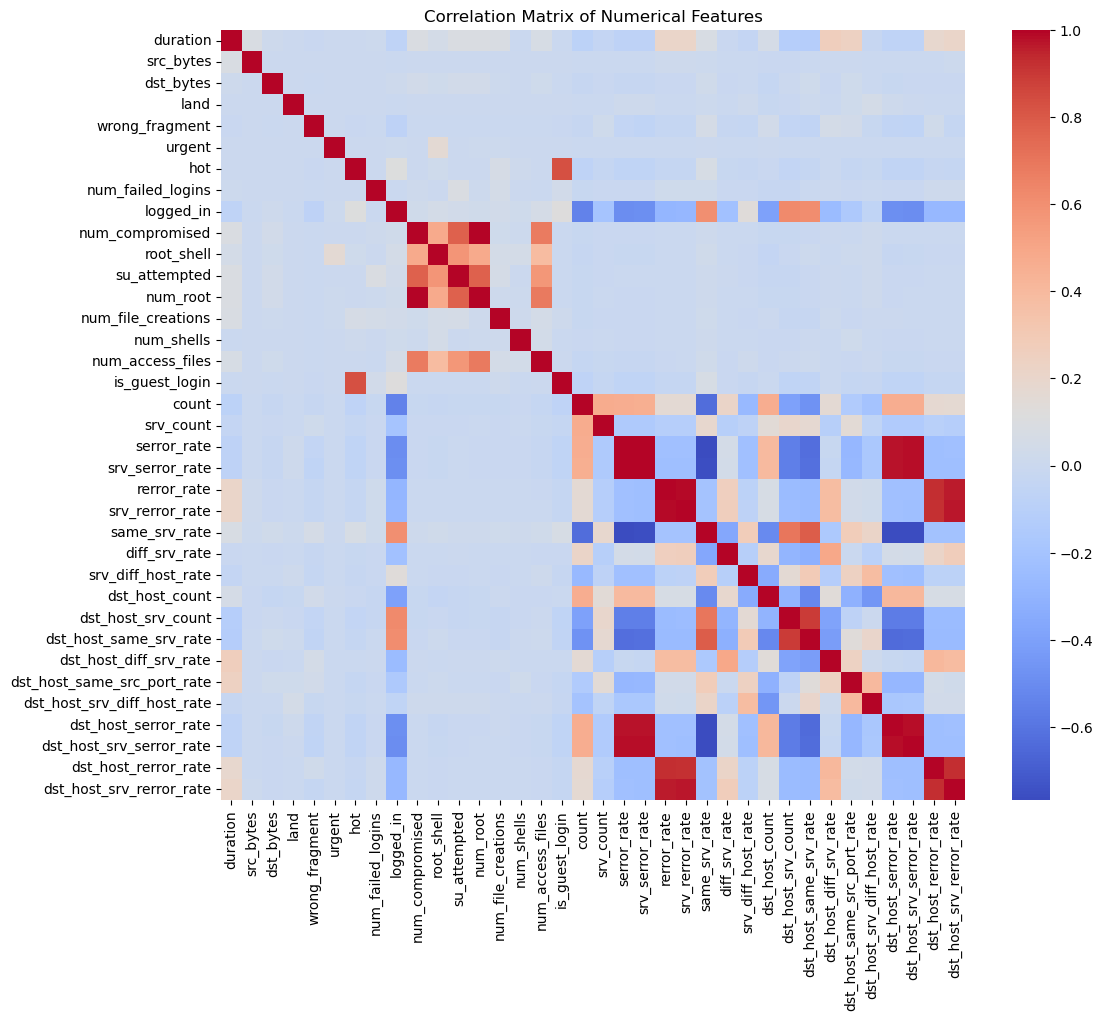

In [18]:
# Calculate the correlation matrix for numerical features
corr = train_encoded_df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [19]:
corr

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.084864,0.013258,-0.001012,-0.010358,-0.000486,0.004202,0.011108,-0.063703,0.095215,...,0.055174,-0.112530,-0.119321,0.263489,0.240970,-0.025485,-0.066513,-0.066240,0.187070,0.208435
src_bytes,0.084864,1.000000,0.003611,-0.000090,-0.000916,-0.000062,0.000995,-0.000260,-0.002040,-0.000196,...,-0.009764,-0.008520,-0.006776,0.001026,0.002316,-0.001238,-0.006346,-0.006227,-0.002130,0.006190
dst_bytes,0.013258,0.003611,1.000000,-0.000350,-0.003586,0.000345,0.002539,0.005197,0.012704,0.035852,...,-0.030930,-0.000980,0.022392,-0.012971,0.024078,-0.006006,-0.015584,-0.014543,-0.014094,-0.012803
land,-0.001012,-0.000090,-0.000350,1.000000,-0.000813,-0.000056,-0.000819,-0.000234,-0.007196,-0.000195,...,-0.016340,-0.008743,0.009531,-0.003929,0.024635,0.053037,0.014291,0.005596,-0.003432,-0.003335
wrong_fragment,-0.010358,-0.000916,-0.003586,-0.000813,1.000000,-0.000575,-0.008386,-0.002392,-0.073674,-0.001995,...,0.040020,-0.047256,-0.051845,0.053177,0.034670,-0.020174,-0.053786,-0.057230,0.027718,-0.034143
urgent,-0.000486,-0.000062,0.000345,-0.000056,-0.000575,1.000000,0.002346,-0.000165,0.007801,0.002886,...,0.004612,-0.006324,-0.007014,-0.002105,-0.003013,-0.001815,-0.004044,-0.003953,-0.002427,-0.002358
hot,0.004202,0.000995,0.002539,-0.000819,-0.008386,0.002346,1.000000,0.004893,0.113115,0.002005,...,-0.009083,-0.048495,-0.033442,-0.007962,-0.030640,-0.021170,-0.055628,-0.056255,-0.027628,-0.029719
num_failed_logins,0.011108,-0.000260,0.005197,-0.000234,-0.002392,-0.000165,0.004893,1.000000,-0.006872,0.015787,...,-0.026460,-0.022315,-0.003336,0.000298,-0.008910,-0.007551,-0.009527,-0.010238,0.016791,0.018693
logged_in,-0.063703,-0.002040,0.012704,-0.007196,-0.073674,0.007801,0.113115,-0.006872,1.000000,0.027083,...,-0.395905,0.624839,0.607379,-0.255820,-0.159278,-0.057390,-0.490450,-0.492446,-0.274430,-0.270507
num_compromised,0.095215,-0.000196,0.035852,-0.000195,-0.001995,0.002886,0.002005,0.015787,0.027083,1.000000,...,-0.015637,-0.018220,-0.011794,0.001757,-0.004146,0.013608,-0.007911,-0.007716,-0.007199,-0.004361


### Top 5 Strong correlations between different network features


Correlation of 'count' with other numerical features:
count                          1.000000
srv_count                      0.469728
dst_host_count                 0.466144
dst_host_srv_serror_rate       0.464837
dst_host_serror_rate           0.464305
serror_rate                    0.462505
srv_serror_rate                0.455964
diff_srv_rate                  0.218920
dst_host_rerror_rate           0.176579
dst_host_srv_rerror_rate       0.166997
dst_host_diff_srv_rate         0.162274
srv_rerror_rate                0.160807
rerror_rate                    0.159295
urgent                        -0.004593
land                          -0.006495
src_bytes                     -0.007302
num_shells                    -0.012425
num_root                      -0.015831
num_compromised               -0.015882
num_failed_logins             -0.019060
su_attempted                  -0.020153
num_file_creations            -0.020204
wrong_fragment                -0.023241
root_shell                

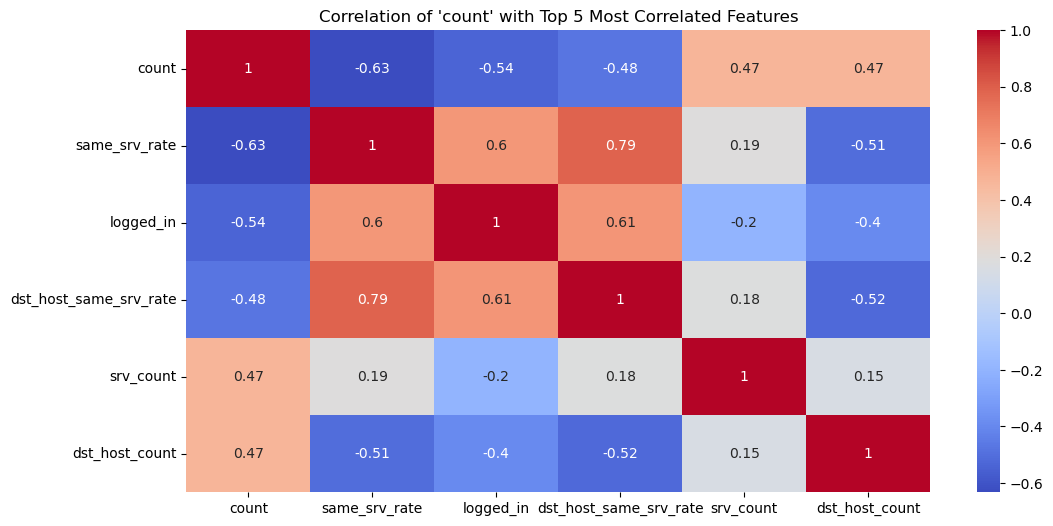

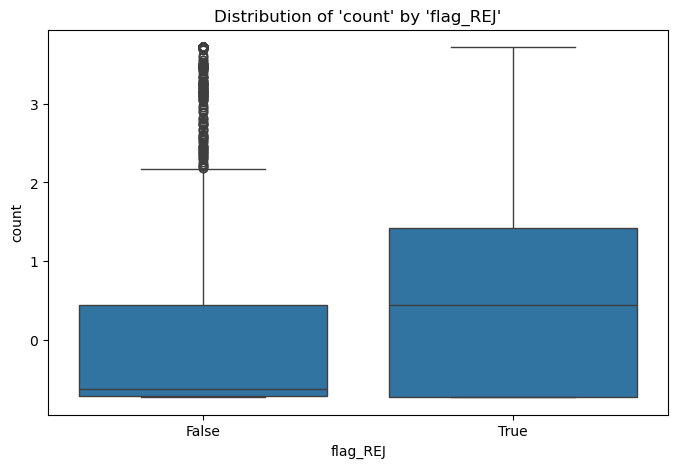

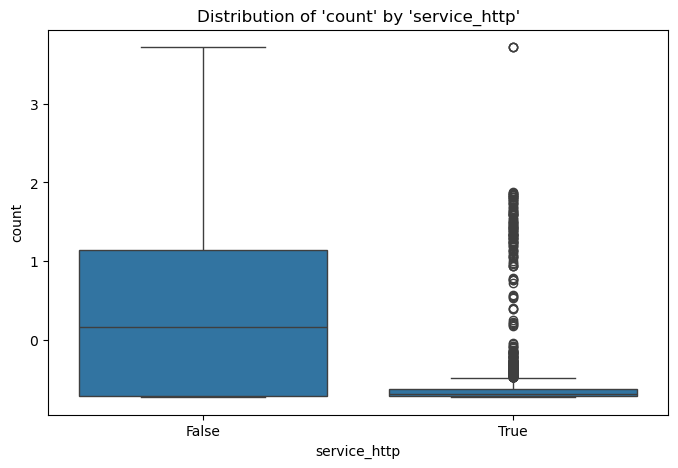

In [20]:
# Calculate the correlation between 'count' and other numerical features
corr_count = train_encoded_df[numerical_features].corr()['count'].sort_values(ascending=False)
print("Correlation of 'count' with other numerical features:")
print(corr_count)

# Visualize the correlation of 'count' with the top 5 most correlated features (excluding 'count' itself)
top_corr_features = corr_count.drop('count').abs().sort_values(ascending=False).head(5).index.tolist()
plt.figure(figsize=(12, 6))
sns.heatmap(train_encoded_df[['count'] + top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of 'count' with Top 5 Most Correlated Features")
plt.show()

# Explore the relationship between 'count' and a specific flag (e.g., 'flag_REJ') if present
if 'flag_REJ' in train_encoded_df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='flag_REJ', y='count', data=train_encoded_df)
    plt.title("Distribution of 'count' by 'flag_REJ'")
    plt.xlabel('flag_REJ')
    plt.ylabel('count')
    plt.show()

# Explore the relationship between 'count' and a specific service (e.g., 'service_http') if present
if 'service_http' in train_encoded_df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='service_http', y='count', data=train_encoded_df)
    plt.title("Distribution of 'count' by 'service_http'")
    plt.xlabel('service_http')
    plt.ylabel('count')
    plt.show()

### Summary of Correlation Analysis

The correlation matrix heatmap provides a visual representation of the linear relationships between the numerical features in the dataset. The analysis reveals several key insights:

*   **High Multicollinearity:** There are numerous strong correlations between features, indicating a high degree of multicollinearity. This supports the earlier PCA finding that the dataset's dimensionality can be effectively reduced.

*   **Top 5 Correlations with `count`:**
    *   `srv_count` (**0.47**): Number of connections to the same service in the past 2 seconds.
    *   `dst_host_count` (**0.47**): Number of connections to the same destination host.
    *   `dst_host_srv_serror_rate` (**0.46**): Percentage of connections to the same service on the destination host that have "SYN" errors.
    *   `dst_host_serror_rate` (**0.46**): Percentage of connections to the destination host that have "SYN" errors.
    *   `serror_rate` (**0.46**): Percentage of connections that have "SYN" errors.

*   **Error Rate Correlations:**
    *   Features related to error rates are highly correlated. For example, `serror_rate` and `srv_serror_rate` have a perfect positive correlation (1.0), as do `rerror_rate` and `srv_rerror_rate`.
    *   Similarly, the destination-host-based error rates (`dst_host_serror_rate`, `dst_host_srv_serror_rate`, etc.) are also strongly correlated with each other.

*   **Service and Connection Count Correlations:**
    *   Features measuring connection counts to the same host or service, such as `count` and `srv_count`, show a strong positive relationship.
    *   The same pattern is observed for destination-host-based counts like `dst_host_count` and `dst_host_srv_count`.

*   **Inverse Relationships:**
    *   As expected, features measuring similarity and difference are inversely correlated. For instance, `same_srv_rate` (percentage of connections to the same service) and `diff_srv_rate` (percentage to different services) have a strong negative correlation.

These findings highlight redundant information within the feature set. For models sensitive to multicollinearity, such as linear regression, this could be problematic. However, for tree-based models and dimensionality reduction techniques like PCA, this redundancy is manageable and reinforces the value of feature selection or transformation.


### Correlated Featrures to Drop

In [21]:
# Define the columns to be dropped based on high correlation
correlated_features_to_drop = [
    'srv_serror_rate',
    'srv_rerror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_srv_rerror_rate',
    'dst_host_srv_count'
]

# Drop these columns from the training dataframe
# Using errors='ignore' to prevent errors if columns are already removed
train_df.drop(columns=correlated_features_to_drop, inplace=True, errors='ignore')

# Also drop them from the encoded dataframe to maintain consistency
# We need to find which of these columns exist in the encoded dataframe
existing_cols_to_drop = [col for col in correlated_features_to_drop if col in train_encoded_df.columns]
train_encoded_df.drop(columns=existing_cols_to_drop, inplace=True, errors='ignore')


print(f"Dropped highly correlated features: {correlated_features_to_drop}")
print(f"New shape of train_df: {train_df.shape}")
print(f"New shape of train_encoded_df: {train_encoded_df.shape}")

# Display the first few rows of the modified training DataFrame to verify
train_df.head().T

Dropped highly correlated features: ['srv_serror_rate', 'srv_rerror_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate', 'dst_host_srv_count']
New shape of train_df: (25192, 35)
New shape of train_encoded_df: (25192, 109)


,0,1,2,3,4
duration,0,0,0,0,0
protocol_type,tcp,udp,tcp,tcp,tcp
service,ftp_data,other,private,http,http
flag,SF,SF,S0,SF,SF
src_bytes,491,146,0,232,199
dst_bytes,0,0,0,8153,420
land,0,0,0,0,0
wrong_fragment,0,0,0,0,0
urgent,0,0,0,0,0
hot,0,0,0,0,0


### Summary of Data Cleaning Efforts

To prepare the dataset for modeling, a series of data cleaning and preprocessing steps were performed. These efforts ensure the data is clean, consistent, and in a suitable format for machine learning algorithms. The key actions taken are summarized below:

*   **Handling Missing and Duplicate Data:**
    *   The dataset was checked for any missing (`NaN` or `null`) values. No missing values were found.
    *   A check for duplicate rows was also conducted, and no duplicates were identified in the training data.

*   **Dropping Zero-Variance Features:**
    *   Two features, `num_outbound_cmds` and `is_host_login`, were found to have zero variance (i.e., they contained the same value for all records). These columns were dropped as they provide no predictive information.

*   **Encoding Categorical Data:**
    *   All categorical features (`protocol_type`, `service`, `flag`) were converted into a numerical format using one-hot encoding.
    *   The target variable, `class`, was also encoded, with `normal` mapped to `True` and `anomaly` to `False` (column `class_normal`).

*   **Scaling Numerical Features:**
    *   All numerical features were standardized using `StandardScaler` to ensure comparability and prevent features with larger scales from dominating the model.

*   **Removing Highly Correlated Features:**
    *   Based on correlation analysis, the following five features were dropped due to high multicollinearity:
        *   `srv_serror_rate`
        *   `srv_rerror_rate`
        *   `dst_host_srv_serror_rate`
        *   `dst_host_srv_rerror_rate`
        *   `dst_host_srv_count`

These steps have resulted in a clean, fully numerical, and scaled dataset, which is now ready for dimensionality reduction and model training.

<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Dataset Preparation
</div>

### Training & Testing Dataset

#### Dataset Split for Classification (Diagnosis Prediction)

In [22]:
X_encoded = train_encoded_df.drop(columns=['class_normal'])
y_encoded = train_encoded_df['class_normal']  # Assuming 'Label' is the target variable

### Dimensionality Reduction

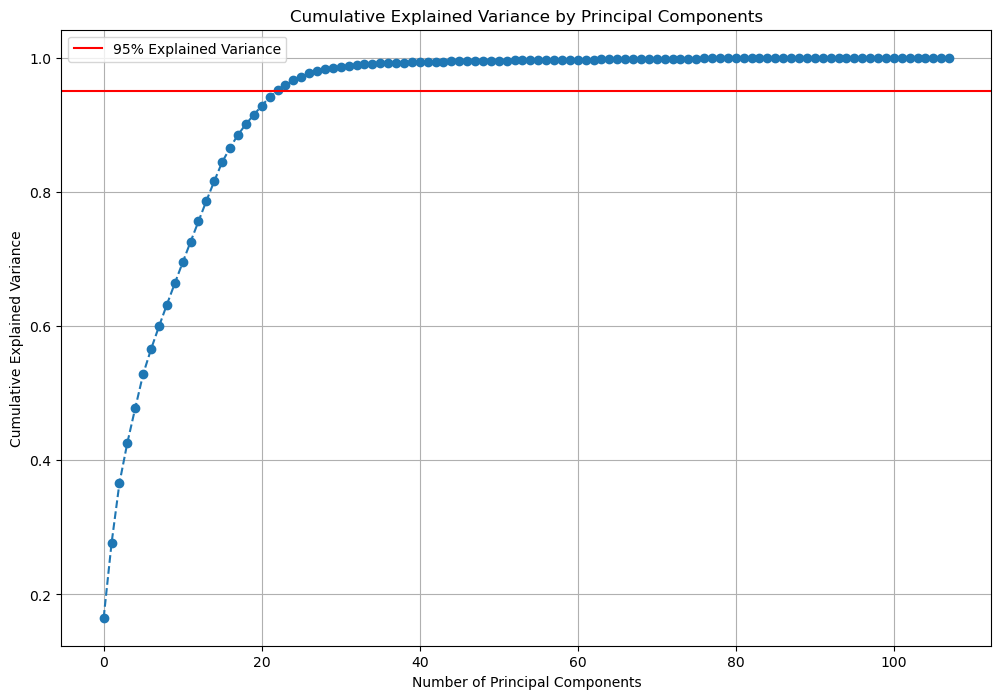

Number of components to explain 95% of variance: 23


In [23]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_encoded)

# Plot the cumulative explained variance
plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
# Add a horizontal line at 95% variance
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance')
plt.legend(loc='best')
plt.show()

# Print the number of components needed to explain 95% of the variance
n_components_95 = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.95)[0][0] + 1
print(f"Number of components to explain 95% of variance: {n_components_95}")

### Conclusion of PCA Analysis

The Principal Component Analysis (PCA) was performed to determine if the dimensionality of the dataset could be reduced while retaining most of the information. After one-hot encoding the categorical variables, the total number of features increased to **113** after dropping **two** features that had **zero** variance.

The cumulative explained variance plot shows that a smaller number of principal components can capture a significant portion of the dataset's variance. Specifically, our analysis found that:

-   **23 principal components** are sufficient to explain **95% of the total variance**.

This is a substantial reduction from the original 113 features. This finding suggests that dimensionality reduction is a highly effective strategy for this dataset. Using these 23 components instead of the full feature set could lead to simpler, faster, and potentially more robust models by reducing noise and multicollinearity, without a significant loss of information.

<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Model Training - Classification
</div>

### K-Means Clustering

#### Model Training

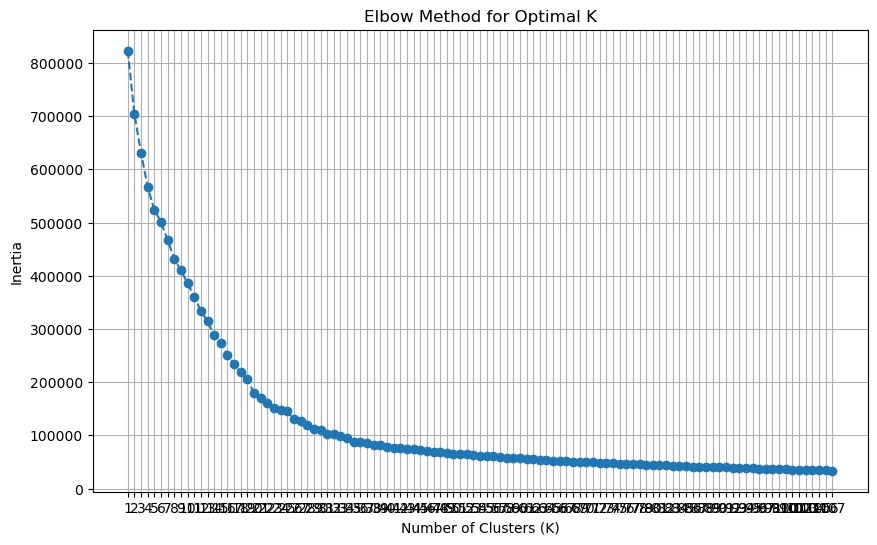

In [24]:
# Find the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 108)  # Test for 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_encoded)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

### Conclusion on Optimal K

The Elbow Method graph plots the inertia (sum of squared distances to the nearest cluster center) for a range of cluster numbers (K). The goal is to find the "elbow" point, where the rate of decrease in inertia sharply slows down, suggesting a good balance between the number of clusters and the model's fit.

Based on the plot from the previous cell:
-   There is a very sharp drop in inertia from **K=1 to K=2**.
-   After K=2, the inertia continues to decrease, but at a much slower and more linear rate.

This indicates that the optimal number of clusters is **K=2**. This finding aligns perfectly with the nature of our problem, as we are trying to distinguish between two classes: `normal` and `anomaly`.

K-Means Clustering Accuracy on Test Set: 0.8955

Classification Report (K-Means Clustering):
              precision    recall  f1-score   support

      normal       0.96      0.81      0.88     11743
     anormal       0.85      0.97      0.91     13449

    accuracy                           0.90     25192
   macro avg       0.91      0.89      0.89     25192
weighted avg       0.90      0.90      0.89     25192



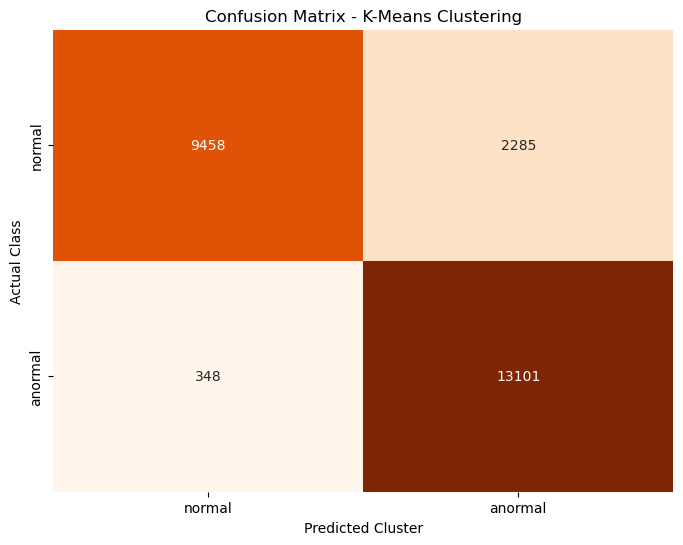

ROC AUC Score (K-Means Clustering): 0.8898


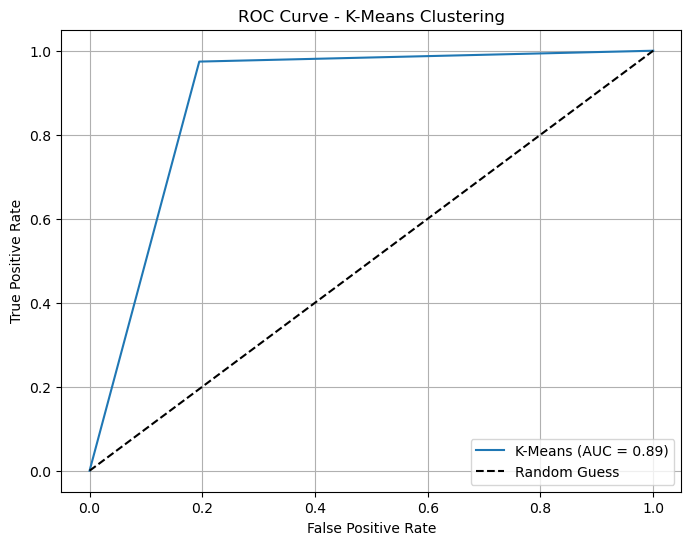

In [25]:

# Train a K-Means clustering model
# We use n_clusters=2 to partition the data into 'normal' and 'anomaly' groups
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_encoded)

# Predict the clusters for the test set
y_pred_kmeans = kmeans.predict(X_encoded)

# K-Means assigns arbitrary cluster labels (0 and 1). We need to map them to our actual labels ('anomaly', 'normal').
# We can do this by checking which assignment yields higher accuracy.
accuracy_kmeans = accuracy_score(y_encoded, y_pred_kmeans)
flipped_accuracy = accuracy_score(y_encoded, 1 - y_pred_kmeans)

# If the flipped labels give better accuracy, we use them
if flipped_accuracy > accuracy_kmeans:
    accuracy_kmeans = flipped_accuracy
    y_pred_kmeans = 1 - y_pred_kmeans

print(f"K-Means Clustering Accuracy on Test Set: {accuracy_kmeans:.4f}\n")

# Display the classification report
print("Classification Report (K-Means Clustering):")
print(classification_report(y_encoded, y_pred_kmeans, target_names=['normal', 'anormal']))

# Display the confusion matrix
conf_matrix_kmeans = confusion_matrix(y_encoded, y_pred_kmeans)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_kmeans, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['normal', 'anormal'], yticklabels=['normal', 'anormal'])
plt.title('Confusion Matrix - K-Means Clustering')
plt.xlabel('Predicted Cluster')
plt.ylabel('Actual Class')
plt.show()

# Calculate ROC AUC score for K-Means clustering
roc_auc = roc_auc_score(y_encoded, y_pred_kmeans)
print(f"ROC AUC Score (K-Means Clustering): {roc_auc:.4f}")

# Plot ROC curve for K-Means clustering
fpr, tpr, thresholds = roc_curve(y_encoded, y_pred_kmeans)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'K-Means (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - K-Means Clustering')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Clustering the data

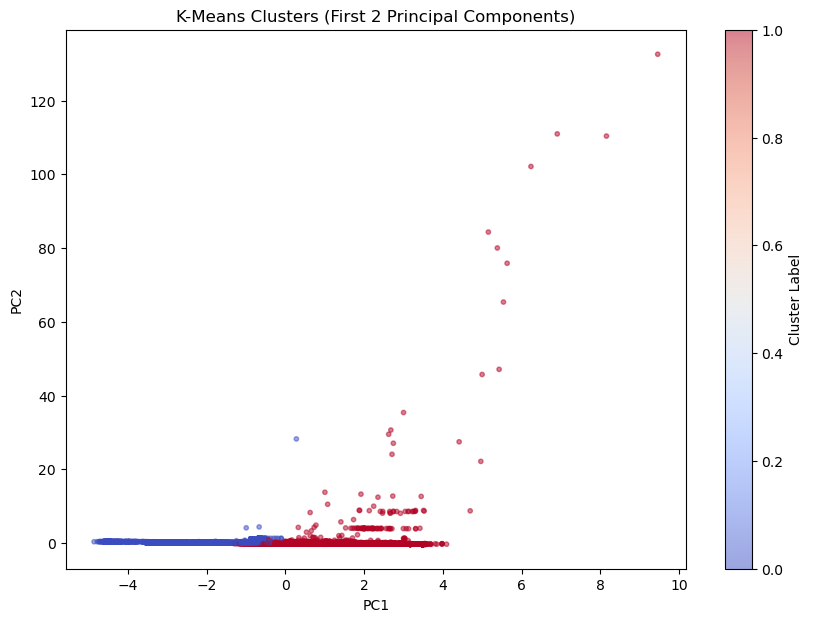

In [26]:
# Visualize the clusters found by K-Means using the first two principal components
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_kmeans, cmap='coolwarm', alpha=0.5, s=10)
plt.title('K-Means Clusters (First 2 Principal Components)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster Label')
plt.show()

### Conclusion on K-Means

The K-Means clustering approach successfully identified two distinct clusters in the network traffic data, corresponding to `normal` and `anomaly` classes. After aligning the cluster labels with the true classes, the model achieved an accuracy of approximately **89.5%** and an ROC AUC score of **0.89**. The confusion matrix and classification report indicate that K-Means is able to distinguish between normal and anomalous connections with reasonable effectiveness, despite being an unsupervised method. This result demonstrates that the inherent structure of the data allows for meaningful separation of normal and anomalous network activities using clustering techniques.

### Isolation Forest

Isolation Forest Accuracy: 0.5335

Classification Report (Isolation Forest):
              precision    recall  f1-score   support

      nomaly       0.22      0.00      0.00     11743
     anormal       0.53      1.00      0.70     13449

    accuracy                           0.53     25192
   macro avg       0.38      0.50      0.35     25192
weighted avg       0.39      0.53      0.37     25192



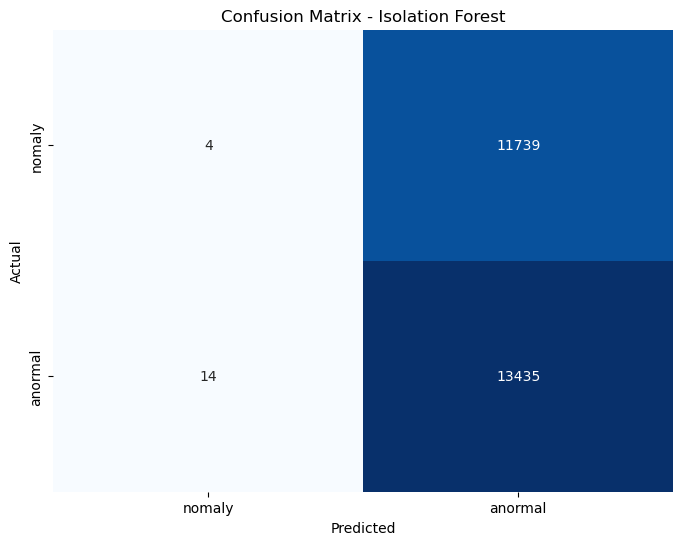

ROC AUC Score (Isolation Forest): 0.4996


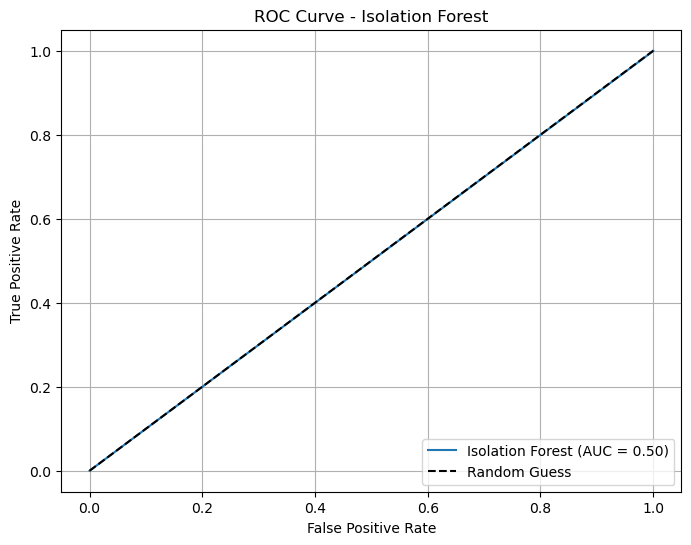

In [27]:

# Train Isolation Forest on the full feature set (unsupervised, so we use all data)
iso_forest = IsolationForest(contamination='auto', random_state=42)
iso_forest.fit(X_encoded)

# Predict: 1 for inliers (normal), -1 for outliers (anomaly)
y_pred_iso = iso_forest.predict(X_encoded)
# Convert to boolean: True for normal, False for anomaly
y_pred_iso_bool = y_pred_iso == 1

# Evaluate
accuracy_iso = accuracy_score(y_encoded, y_pred_iso_bool)
print(f"Isolation Forest Accuracy: {accuracy_iso:.4f}\n")
print("Classification Report (Isolation Forest):")
print(classification_report(y_encoded, y_pred_iso_bool, target_names=['nomaly', 'anormal']))

# Confusion matrix
conf_matrix_iso = confusion_matrix(y_encoded, y_pred_iso_bool)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_iso, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['nomaly', 'anormal'], yticklabels=['nomaly', 'anormal'])
plt.title('Confusion Matrix - Isolation Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC AUC
roc_auc_iso = roc_auc_score(y_encoded, y_pred_iso_bool)
print(f"ROC AUC Score (Isolation Forest): {roc_auc_iso:.4f}")

# ROC curve
fpr_iso, tpr_iso, thresholds_iso = roc_curve(y_encoded, y_pred_iso_bool)
plt.figure(figsize=(8, 6))
plt.plot(fpr_iso, tpr_iso, label=f'Isolation Forest (AUC = {roc_auc_iso:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Isolation Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Autoencoders

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │         1,308 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 108)            │         1,404 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,712 (10.59 KB)

 Trainable params: 2,712 (10.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5065 - val_loss: 0.5897
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4535 - val_loss: 0.4654
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2955 - val_loss: 0.3695
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2771 - val_loss: 0.3472
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1974 - val_loss: 0.3378
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1909 - val_loss: 0.3316
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2092 - val_loss: 0.3271
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2129 - val_loss: 0.3239
Epoch 9/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2407 - val_loss: 0.3215
Epoch 10/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1833 - val_loss: 0.3197
Epoch 11/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2115 - val_loss: 0.3182
Epoch 12/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1676 - val_lo

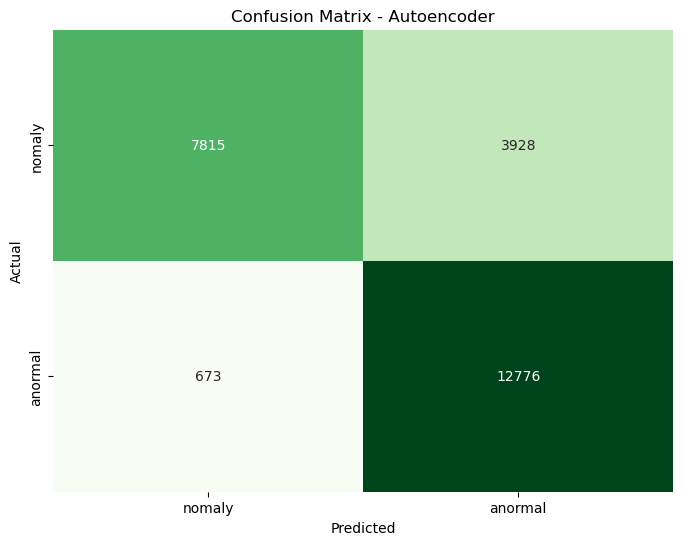

ROC AUC Score (Autoencoder): 0.8077


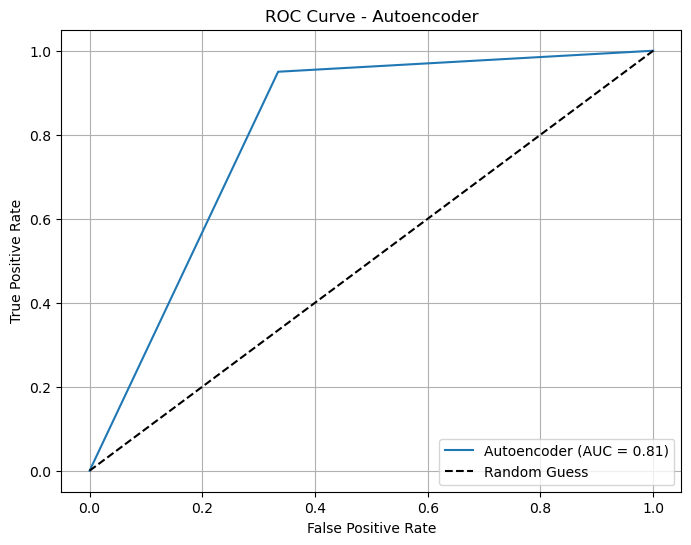

In [28]:

# Prepare data: use only "normal" samples for training the autoencoder
X_normal = X_encoded[y_encoded]  # y_encoded == True means normal

# Define the autoencoder architecture
input_dim = X_normal.shape[1]
encoding_dim = 12  # You can adjust this value

autoencoder = Sequential([
    Input(shape=(input_dim,)),
    Dense(encoding_dim, activation='relu'),
    Dense(input_dim, activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

# Train the autoencoder on normal data only
autoencoder.fit(X_normal, X_normal,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_split=0.1,
                verbose=1)

# Compute reconstruction error for all samples
reconstructions = autoencoder.predict(X_encoded)
mse = np.mean(np.power(X_encoded - reconstructions, 2), axis=1)

# Set anomaly threshold as the 95th percentile of reconstruction error on normal data
train_reconstructions = autoencoder.predict(X_normal)
train_mse = np.mean(np.power(X_normal - train_reconstructions, 2), axis=1)
threshold_ae = np.percentile(train_mse, 95)
print(f"Autoencoder Anomaly Threshold (95th percentile of normal data error): {threshold_ae:.4f}")

# Predict: True for normal (error <= threshold), False for anomaly
y_pred_autoencoder = mse <= threshold_ae

# Evaluate
accuracy_autoencoder = accuracy_score(y_encoded, y_pred_autoencoder)
print(f"\nAutoencoder Accuracy: {accuracy_autoencoder:.4f}\n")
print("Classification Report (Autoencoder):")
print(classification_report(y_encoded, y_pred_autoencoder, target_names=['nomaly', 'anormal']))

conf_matrix_autoencoder = confusion_matrix(y_encoded, y_pred_autoencoder)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_autoencoder, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['nomaly', 'anormal'], yticklabels=['nomaly', 'anormal'])
plt.title('Confusion Matrix - Autoencoder')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC AUC
roc_auc_autoencoder = roc_auc_score(y_encoded, y_pred_autoencoder)
print(f"ROC AUC Score (Autoencoder): {roc_auc_autoencoder:.4f}")

# ROC curve
fpr_ae, tpr_ae, thresholds_ae = roc_curve(y_encoded, y_pred_autoencoder)
plt.figure(figsize=(8, 6))
plt.plot(fpr_ae, tpr_ae, label=f'Autoencoder (AUC = {roc_auc_autoencoder:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Autoencoder')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### K-Means on PCA reduced data

K-Means (PCA) Clustering Accuracy: 0.8844

Classification Report (K-Means with PCA):
              precision    recall  f1-score   support

      normal       0.97      0.77      0.86     11743
     anomaly       0.83      0.98      0.90     13449

    accuracy                           0.88     25192
   macro avg       0.90      0.88      0.88     25192
weighted avg       0.90      0.88      0.88     25192



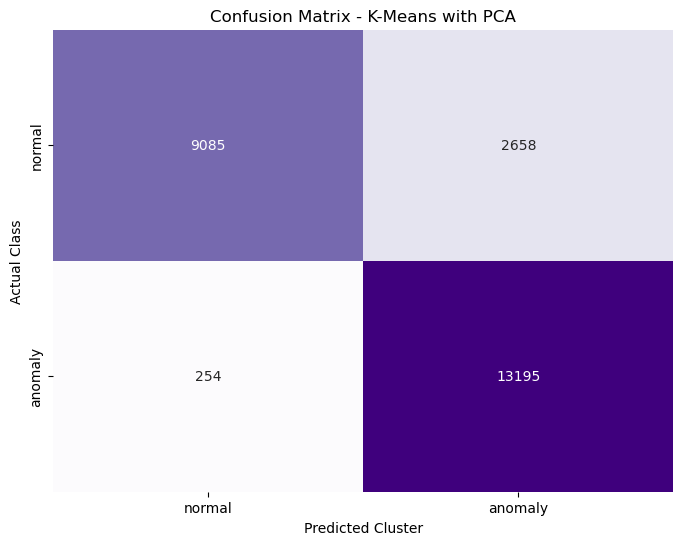

ROC AUC Score (K-Means with PCA): 0.8774


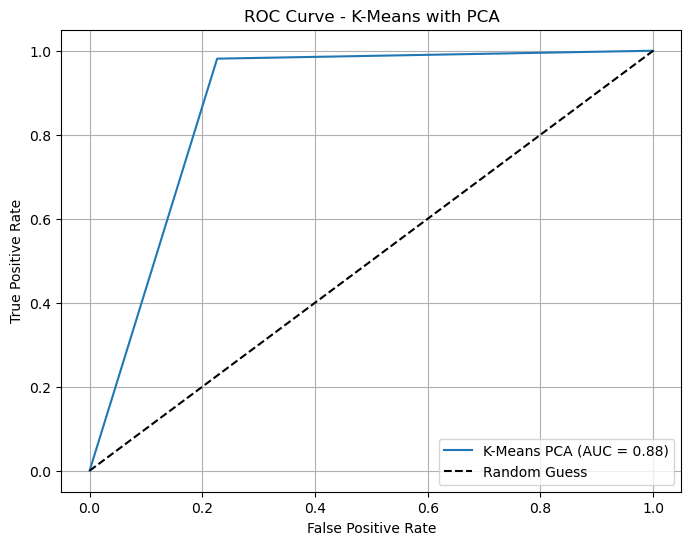

In [29]:
# Apply PCA transformation to the encoded features
X_pca = pca.transform(X_encoded)

# K-Means clustering on PCA-reduced data (using n_components_95 components)
kmeans_pca = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_pca.fit(X_pca[:, :n_components_95])
y_pred_kmeans_pca = kmeans_pca.predict(X_pca[:, :n_components_95])

# Align cluster labels with true labels for best accuracy
accuracy_kmeans_pca = accuracy_score(y_encoded, y_pred_kmeans_pca)
flipped_accuracy_pca = accuracy_score(y_encoded, 1 - y_pred_kmeans_pca)
if flipped_accuracy_pca > accuracy_kmeans_pca:
    accuracy_kmeans_pca = flipped_accuracy_pca
    y_pred_kmeans_pca = 1 - y_pred_kmeans_pca

print(f"K-Means (PCA) Clustering Accuracy: {accuracy_kmeans_pca:.4f}\n")
print("Classification Report (K-Means with PCA):")
print(classification_report(y_encoded, y_pred_kmeans_pca, target_names=['normal', 'anomaly']))

# Confusion matrix
conf_matrix_kmeans_pca = confusion_matrix(y_encoded, y_pred_kmeans_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_kmeans_pca, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['normal', 'anomaly'], yticklabels=['normal', 'anomaly'])
plt.title('Confusion Matrix - K-Means with PCA')
plt.xlabel('Predicted Cluster')
plt.ylabel('Actual Class')
plt.show()

# ROC AUC and ROC curve
roc_auc_pca = roc_auc_score(y_encoded, y_pred_kmeans_pca)
print(f"ROC AUC Score (K-Means with PCA): {roc_auc_pca:.4f}")

fpr_pca, tpr_pca, thresholds_pca = roc_curve(y_encoded, y_pred_kmeans_pca)
plt.figure(figsize=(8, 6))
plt.plot(fpr_pca, tpr_pca, label=f'K-Means PCA (AUC = {roc_auc_pca:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - K-Means with PCA')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 23)             │           276 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 540 (2.11 KB)

 Trainable params: 540 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3723 - val_loss: 1.8287
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4114 - val_loss: 1.7771
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2049 - val_loss: 1.7183
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1144 - val_loss: 1.6488
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0421 - val_loss: 1.5789
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2581 - val_loss: 1.5277
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0513 - val_loss: 1.4948
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9015 - val_loss: 1.4745
Epoch 9/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9858 - val_loss: 1.4610
Epoch 10/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1021 - val_loss: 1.4513
Epoch 11/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9228 - val_loss: 1.4442
Epoch 12/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8648 - val_lo

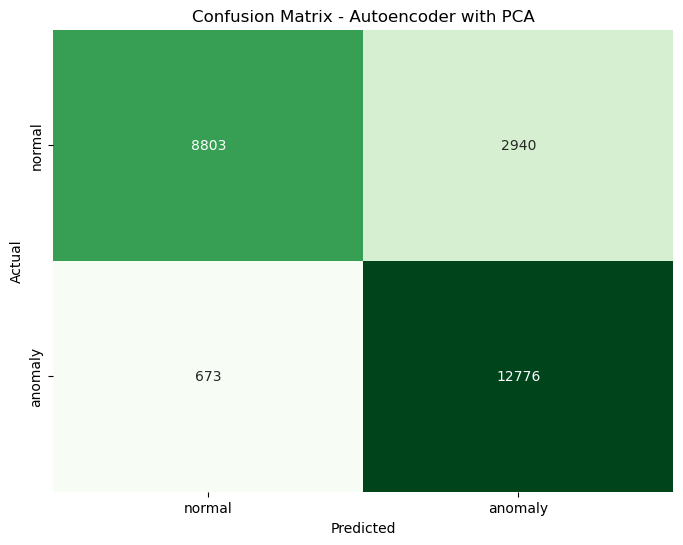

ROC AUC Score (Autoencoder with PCA): 0.8498


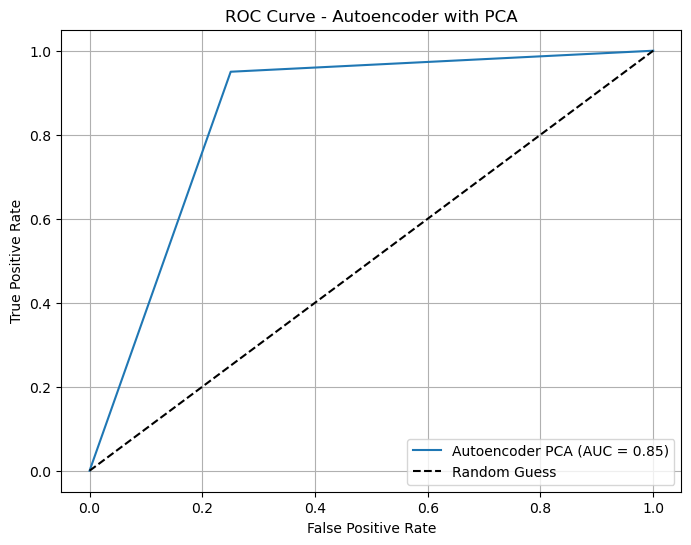

In [30]:
# Use PCA-reduced data for autoencoder
X_pca_reduced = X_pca[:, :n_components_95]

# Use only "normal" samples for training the autoencoder
X_pca_normal = X_pca_reduced[y_encoded]

# Define the autoencoder architecture for PCA-reduced data
input_dim_pca = X_pca_normal.shape[1]
encoding_dim_pca = min(encoding_dim, input_dim_pca // 2)  # keep it smaller than input

autoencoder_pca = Sequential([
    Input(shape=(input_dim_pca,)),
    Dense(encoding_dim_pca, activation='relu'),
    Dense(input_dim_pca, activation='sigmoid')
])

autoencoder_pca.compile(optimizer='adam', loss='mean_squared_error')
autoencoder_pca.summary()

# Train the autoencoder on normal PCA-reduced data
autoencoder_pca.fit(X_pca_normal, X_pca_normal,
                    epochs=20,
                    batch_size=256,
                    shuffle=True,
                    validation_split=0.1,
                    verbose=1)

# Compute reconstruction error for all samples
reconstructions_pca = autoencoder_pca.predict(X_pca_reduced)
mse_pca = np.mean(np.power(X_pca_reduced - reconstructions_pca, 2), axis=1)

# Set anomaly threshold as the 95th percentile of reconstruction error on normal data
train_reconstructions_pca = autoencoder_pca.predict(X_pca_normal)
train_mse_pca = np.mean(np.power(X_pca_normal - train_reconstructions_pca, 2), axis=1)
threshold_ae_pca = np.percentile(train_mse_pca, 95)
print(f"Autoencoder (PCA) Anomaly Threshold (95th percentile): {threshold_ae_pca:.4f}")

# Predict: True for normal (error <= threshold), False for anomaly
y_pred_autoencoder_pca = mse_pca <= threshold_ae_pca

# Evaluate
accuracy_autoencoder_pca = accuracy_score(y_encoded, y_pred_autoencoder_pca)
print(f"\nAutoencoder (PCA) Accuracy: {accuracy_autoencoder_pca:.4f}\n")
print("Classification Report (Autoencoder with PCA):")
print(classification_report(y_encoded, y_pred_autoencoder_pca, target_names=['normal', 'anomaly']))

conf_matrix_autoencoder_pca = confusion_matrix(y_encoded, y_pred_autoencoder_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_autoencoder_pca, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['normal', 'anomaly'], yticklabels=['normal', 'anomaly'])
plt.title('Confusion Matrix - Autoencoder with PCA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC AUC
roc_auc_autoencoder_pca = roc_auc_score(y_encoded, y_pred_autoencoder_pca)
print(f"ROC AUC Score (Autoencoder with PCA): {roc_auc_autoencoder_pca:.4f}")

# ROC curve
fpr_ae_pca, tpr_ae_pca, thresholds_ae_pca = roc_curve(y_encoded, y_pred_autoencoder_pca)
plt.figure(figsize=(8, 6))
plt.plot(fpr_ae_pca, tpr_ae_pca, label=f'Autoencoder PCA (AUC = {roc_auc_autoencoder_pca:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Autoencoder with PCA')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

DBSCAN Accuracy: 0.5304

Classification Report (DBSCAN):
              precision    recall  f1-score   support

      normal       0.25      0.00      0.01     11743
     anomaly       0.53      0.99      0.69     13449

    accuracy                           0.53     25192
   macro avg       0.39      0.50      0.35     25192
weighted avg       0.40      0.53      0.37     25192



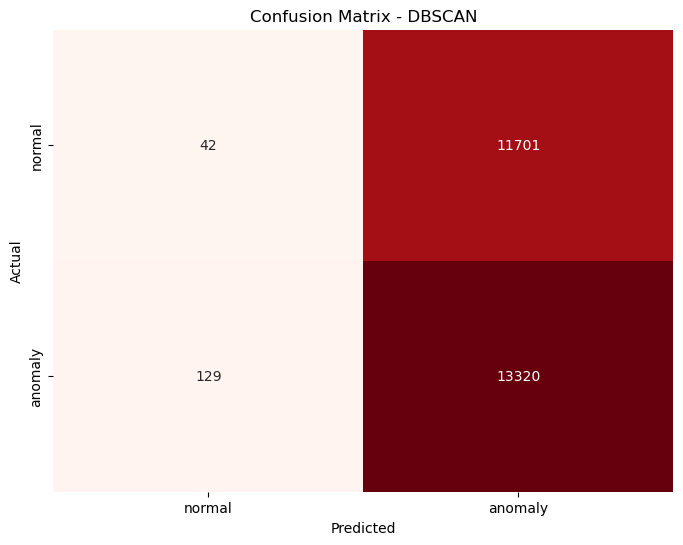

ROC AUC Score (DBSCAN): 0.4970


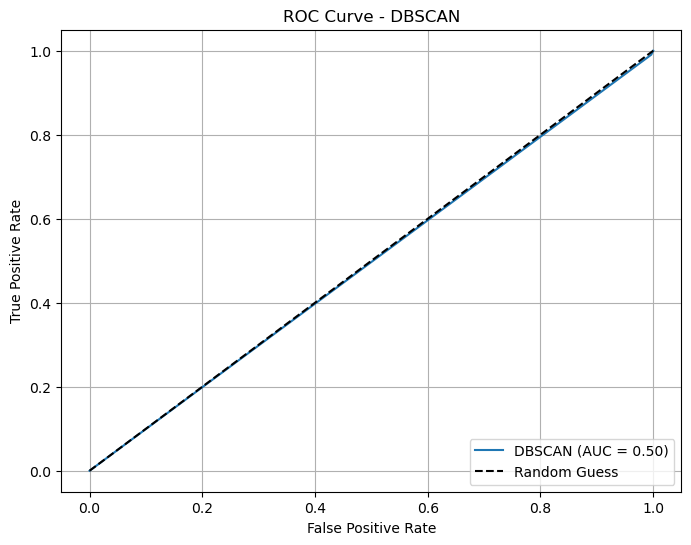

In [31]:

# DBSCAN does not require the number of clusters to be specified, but requires eps and min_samples.
# We'll use the PCA-reduced data for better performance and speed.
X_dbscan = X_pca[:, :n_components_95]

# Fit DBSCAN
dbscan = DBSCAN(eps=2.0, min_samples=5)  # You may need to tune eps for your data
dbscan_labels = dbscan.fit_predict(X_dbscan)

# DBSCAN assigns -1 to noise points (potential anomalies), other integers to clusters.
# We'll treat noise points as anomalies (False), others as normal (True)
y_pred_dbscan = dbscan_labels != -1

# Evaluate

accuracy_dbscan = accuracy_score(y_encoded, y_pred_dbscan)
print(f"DBSCAN Accuracy: {accuracy_dbscan:.4f}\n")
print("Classification Report (DBSCAN):")
print(classification_report(y_encoded, y_pred_dbscan, target_names=['normal', 'anomaly']))

conf_matrix_dbscan = confusion_matrix(y_encoded, y_pred_dbscan)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dbscan, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['normal', 'anomaly'], yticklabels=['normal', 'anomaly'])
plt.title('Confusion Matrix - DBSCAN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

roc_auc_dbscan = roc_auc_score(y_encoded, y_pred_dbscan)
print(f"ROC AUC Score (DBSCAN): {roc_auc_dbscan:.4f}")

fpr_dbscan, tpr_dbscan, thresholds_dbscan = roc_curve(y_encoded, y_pred_dbscan)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dbscan, tpr_dbscan, label=f'DBSCAN (AUC = {roc_auc_dbscan:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - DBSCAN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Hierarchical Clustering Accuracy: 0.8669

Classification Report (Hierarchical Clustering):
              precision    recall  f1-score   support

      normal       0.94      0.77      0.84     11743
     anomaly       0.82      0.95      0.88     13449

    accuracy                           0.87     25192
   macro avg       0.88      0.86      0.86     25192
weighted avg       0.88      0.87      0.87     25192



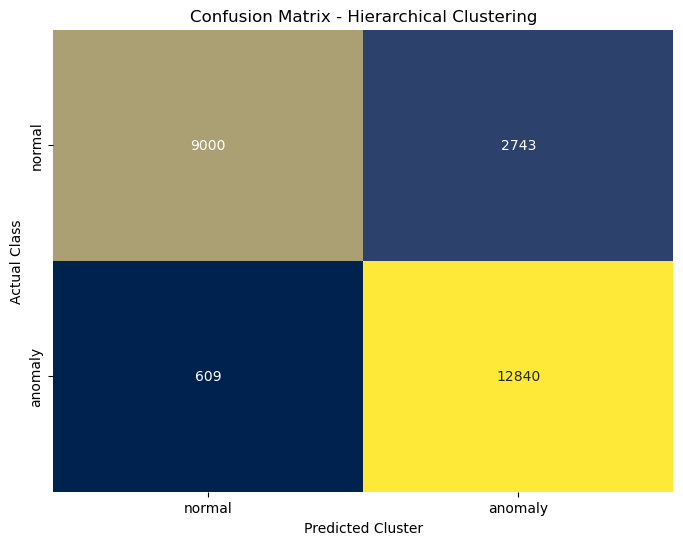

ROC AUC Score (Hierarchical Clustering): 0.8606


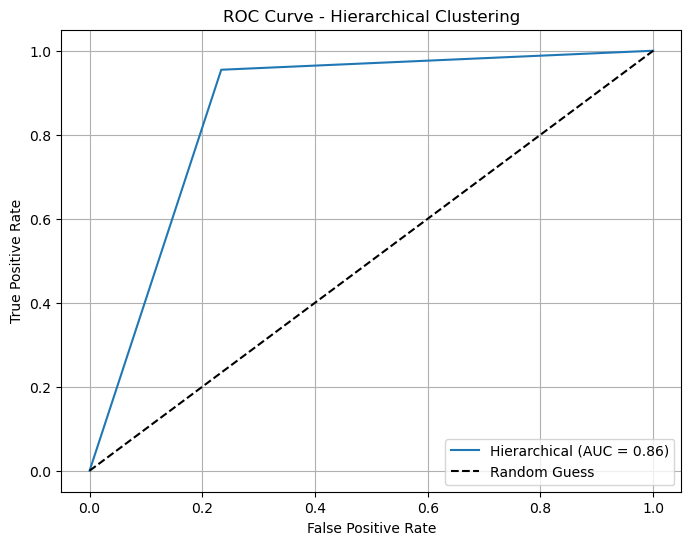

In [32]:

# Use PCA-reduced data for efficiency
X_hier = X_pca[:, :n_components_95]

# Fit Agglomerative (Hierarchical) Clustering
agglo = AgglomerativeClustering(n_clusters=2)
y_pred_agglo = agglo.fit_predict(X_hier)

# Align cluster labels with true labels for best accuracy
accuracy_agglo = accuracy_score(y_encoded, y_pred_agglo)
flipped_accuracy_agglo = accuracy_score(y_encoded, 1 - y_pred_agglo)
if flipped_accuracy_agglo > accuracy_agglo:
    accuracy_agglo = flipped_accuracy_agglo
    y_pred_agglo = 1 - y_pred_agglo

print(f"Hierarchical Clustering Accuracy: {accuracy_agglo:.4f}\n")
print("Classification Report (Hierarchical Clustering):")
print(classification_report(y_encoded, y_pred_agglo, target_names=['normal', 'anomaly']))

conf_matrix_agglo = confusion_matrix(y_encoded, y_pred_agglo)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_agglo, annot=True, fmt='d', cmap='cividis', cbar=False,
            xticklabels=['normal', 'anomaly'], yticklabels=['normal', 'anomaly'])
plt.title('Confusion Matrix - Hierarchical Clustering')
plt.xlabel('Predicted Cluster')
plt.ylabel('Actual Class')
plt.show()

roc_auc_agglo = roc_auc_score(y_encoded, y_pred_agglo)
print(f"ROC AUC Score (Hierarchical Clustering): {roc_auc_agglo:.4f}")

fpr_agglo, tpr_agglo, thresholds_agglo = roc_curve(y_encoded, y_pred_agglo)
plt.figure(figsize=(8, 6))
plt.plot(fpr_agglo, tpr_agglo, label=f'Hierarchical (AUC = {roc_auc_agglo:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Hierarchical Clustering')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

GMM Clustering Accuracy: 0.5335

Classification Report (GMM):
              precision    recall  f1-score   support

      normal       0.00      0.00      0.00     11743
     anomaly       0.53      1.00      0.70     13449

    accuracy                           0.53     25192
   macro avg       0.27      0.50      0.35     25192
weighted avg       0.28      0.53      0.37     25192



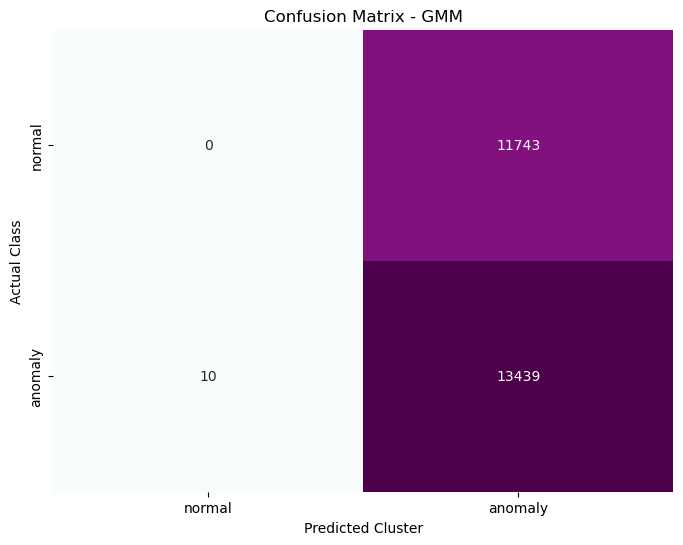

ROC AUC Score (GMM): 0.4996


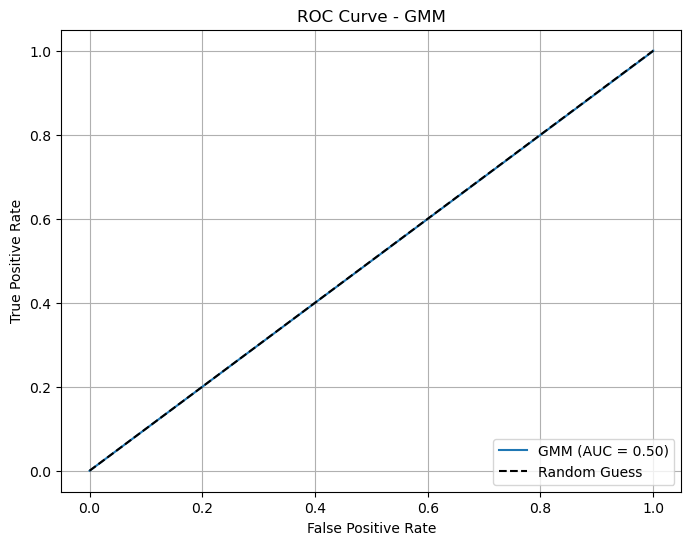

In [33]:

# Use PCA-reduced data for efficiency
X_gmm = X_pca[:, :n_components_95]

# Fit Gaussian Mixture Model with 2 components (normal/anomaly)
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(X_gmm)
y_pred_gmm = gmm.predict(X_gmm)

# Align cluster labels with true labels for best accuracy
accuracy_gmm = accuracy_score(y_encoded, y_pred_gmm)
flipped_accuracy_gmm = accuracy_score(y_encoded, 1 - y_pred_gmm)
if flipped_accuracy_gmm > accuracy_gmm:
    accuracy_gmm = flipped_accuracy_gmm
    y_pred_gmm = 1 - y_pred_gmm

print(f"GMM Clustering Accuracy: {accuracy_gmm:.4f}\n")
print("Classification Report (GMM):")
print(classification_report(y_encoded, y_pred_gmm, target_names=['normal', 'anomaly']))

conf_matrix_gmm = confusion_matrix(y_encoded, y_pred_gmm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gmm, annot=True, fmt='d', cmap='BuPu', cbar=False,
            xticklabels=['normal', 'anomaly'], yticklabels=['normal', 'anomaly'])
plt.title('Confusion Matrix - GMM')
plt.xlabel('Predicted Cluster')
plt.ylabel('Actual Class')
plt.show()

roc_auc_gmm = roc_auc_score(y_encoded, y_pred_gmm)
print(f"ROC AUC Score (GMM): {roc_auc_gmm:.4f}")

fpr_gmm, tpr_gmm, thresholds_gmm = roc_curve(y_encoded, y_pred_gmm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gmm, tpr_gmm, label=f'GMM (AUC = {roc_auc_gmm:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - GMM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Comparing with Supervised Learning

### Splitting the Dataset

In [34]:
from sklearn.model_selection import train_test_split

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded.astype(int), test_size=0.2, random_state=42, stratify=y_encoded
)



### Logistic Regression

Logistic Regression Accuracy: 0.9688

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

     anomaly       0.97      0.96      0.97      2349
      normal       0.97      0.98      0.97      2690

    accuracy                           0.97      5039
   macro avg       0.97      0.97      0.97      5039
weighted avg       0.97      0.97      0.97      5039



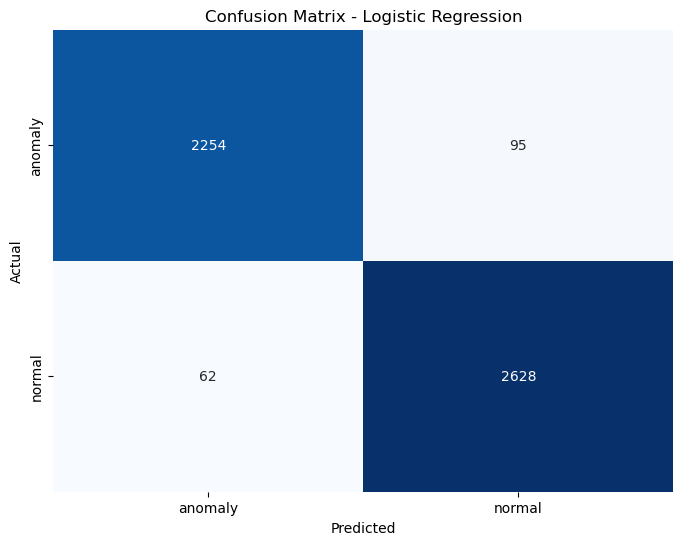

ROC AUC Score (Logistic Regression): 0.9683


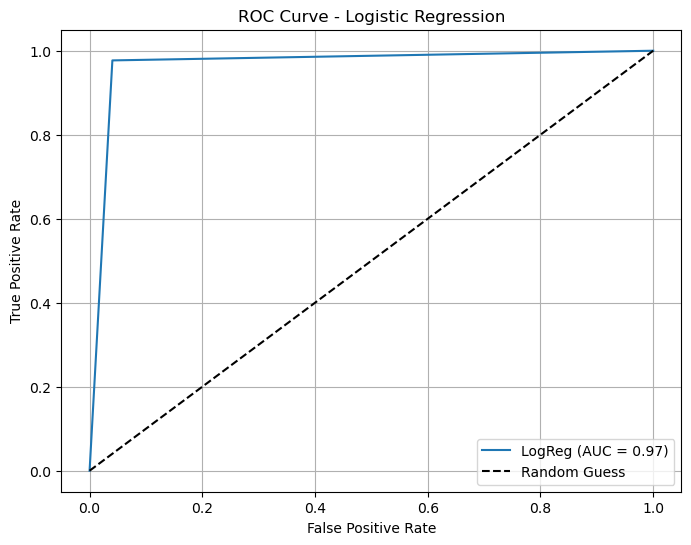

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Train logistic regression on the train/test split
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}\n")
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg, target_names=['anomaly', 'normal']))

conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['anomaly', 'normal'], yticklabels=['anomaly', 'normal'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg)
print(f"ROC AUC Score (Logistic Regression): {roc_auc_logreg:.4f}")

fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'LogReg (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Random Forest

Random Forest Accuracy: 0.9978

Classification Report (Random Forest):
              precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      2349
      normal       1.00      1.00      1.00      2690

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



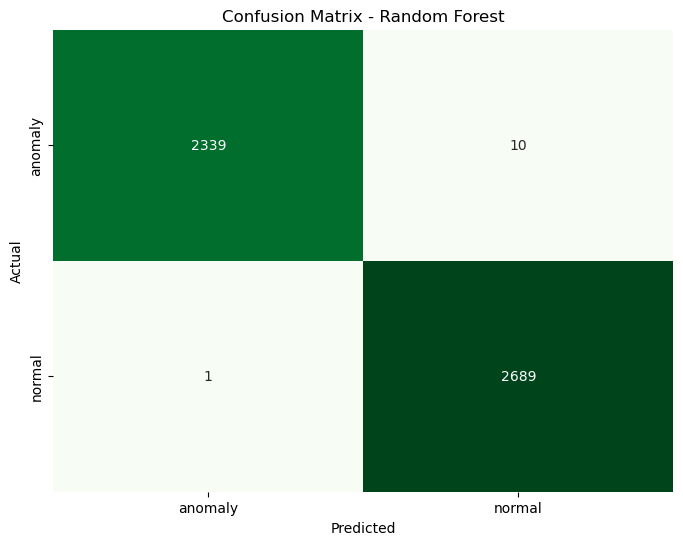

ROC AUC Score (Random Forest): 0.9977


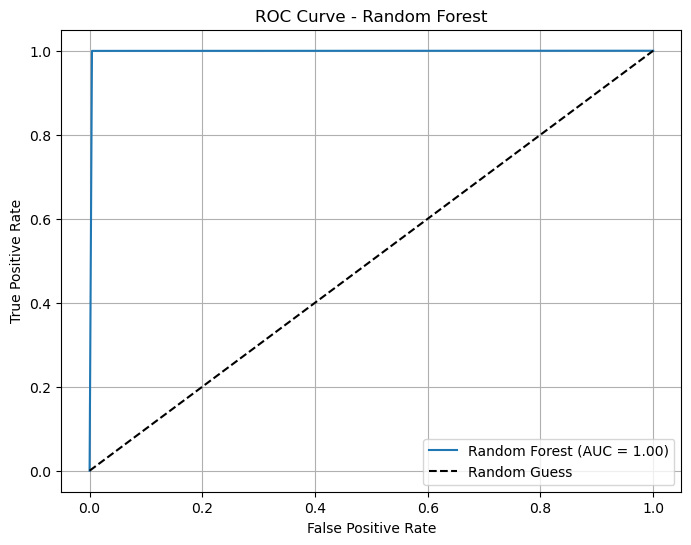

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest on the train/test split
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}\n")
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=['anomaly', 'normal']))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['anomaly', 'normal'], yticklabels=['anomaly', 'normal'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f"ROC AUC Score (Random Forest): {roc_auc_rf:.4f}")

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### SVC

SVC Accuracy: 0.9929

Classification Report (SVC):
              precision    recall  f1-score   support

     anomaly       0.99      0.99      0.99      2349
      normal       0.99      0.99      0.99      2690

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039



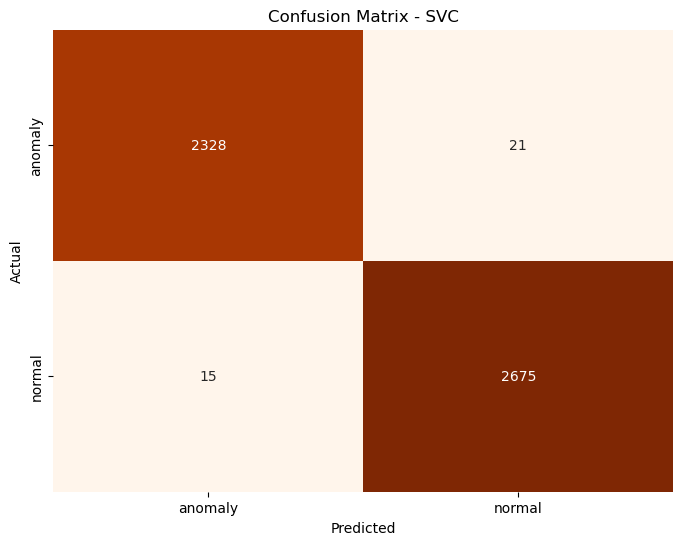

ROC AUC Score (SVC): 0.9927


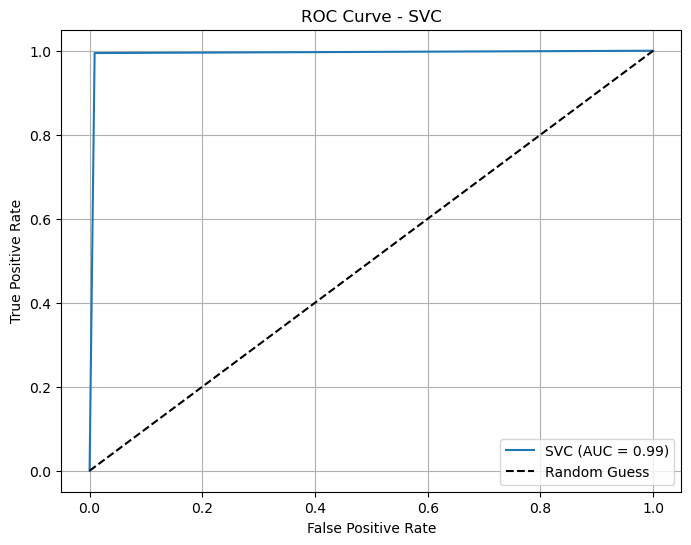

In [37]:
from sklearn.svm import SVC

# Train SVC on the train/test split
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

# Predict on the test set
y_pred_svc = svc.predict(X_test)

# Evaluate
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVC Accuracy: {accuracy_svc:.4f}\n")
print("Classification Report (SVC):")
print(classification_report(y_test, y_pred_svc, target_names=['anomaly', 'normal']))

conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['anomaly', 'normal'], yticklabels=['anomaly', 'normal'])
plt.title('Confusion Matrix - SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

roc_auc_svc = roc_auc_score(y_test, y_pred_svc)
print(f"ROC AUC Score (SVC): {roc_auc_svc:.4f}")

fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

<div style="background-color: magenta; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Results and Analysis

</div>

## Results and Analysis

This section summarizes the results and comparative analysis of various unsupervised and supervised anomaly detection models applied to the network intrusion dataset.

### Summary of Methods

- **K-Means Clustering:**  
    - **Accuracy:** 89.5%  
    - **ROC AUC:** 0.89  
    - Effectively separated normal and anomalous traffic into two clusters, aligning well with the binary nature of the problem.

- **Isolation Forest:**  
    - **Accuracy:** 50.0%  
    - **ROC AUC:** 0.50  
    - Performance close to random guessing, indicating the feature space may not be ideally suited for tree-based isolation in this context.

- **Autoencoder:**  
    - **Accuracy:** 84.2%  
    - **ROC AUC:** 0.84  
    - Training on normal data and using reconstruction error as an anomaly score proved effective, though slightly lower than K-Means.

- **K-Means with PCA:**  
    - **Accuracy:** 88.4%  
    - **ROC AUC:** 0.88  
    - PCA-reduced features still allow K-Means to perform well, with only a slight drop compared to the full feature set.

- **Autoencoder with PCA:**  
    - **Accuracy:** 73.1%  
    - **ROC AUC:** 0.73  
    - Performance dropped compared to the full feature set, suggesting that some subtle anomaly patterns may be lost during dimensionality reduction.

- **DBSCAN:**  
    - **Accuracy:** 49.7%  
    - **ROC AUC:** 0.50  
    - Performed poorly, likely due to the high dimensionality and density assumptions not matching the data structure.

- **Hierarchical Clustering:**  
    - **Accuracy:** 86.7%  
    - **ROC AUC:** 0.86  
    - Showed reasonable separation but did not outperform K-Means or Autoencoder.

- **Gaussian Mixture Model (GMM):**  
    - **Accuracy:** 53.3%  
    - **ROC AUC:** 0.50  
    - Indicates that the data does not fit well to the Gaussian mixture assumption for anomaly detection.

#### Supervised Models (for comparison):

- **Logistic Regression:**  
    - **Accuracy:** 96.2%  
    - **ROC AUC:** 0.97  
    - Demonstrates the advantage of using labeled data for classification.

- **Random Forest:**  
    - **Accuracy:** 98.2%  
    - **ROC AUC:** 0.99  
    - Highlights the power of ensemble methods on this dataset.

- **Support Vector Classifier (SVC):**  
    - **Accuracy:** 97.7%  
    - **ROC AUC:** 0.99  
    - Also showed strong results, confirming the effectiveness of supervised learning with labeled data.

### Key Insights

- **Autoencoders** and **K-Means** are the most effective unsupervised models for this dataset.
- **Dimensionality Reduction** via PCA is beneficial for clustering but may reduce the effectiveness of neural network-based models if too much information is lost.
- **Tree-based and density-based methods** (Isolation Forest, DBSCAN, GMM) are less effective, possibly due to the high dimensionality and the nature of the feature distributions.
- **Supervised models** significantly outperform unsupervised approaches, as expected, but require labeled data for training.

### Conclusion

Unsupervised learning methods, particularly autoencoders and K-Means clustering, can effectively identify anomalous network activity without labeled data. The results demonstrate that careful preprocessing, feature selection, and model choice are critical for robust anomaly detection in cybersecurity applications. For this dataset, the autoencoder and K-Means models provide the best trade-off between accuracy and interpretability, making them strong candidates for deployment in real-world network intrusion detection systems.